In [53]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sb
import matplotlib.pyplot as plt       # Standard plotting library                 
from IPython.display import display   # A notebook function to display more complex data (like tables)
import scipy.stats as stats           # Scipy again
from math import *

In [2]:
#read an csv file 
df = pd.read_csv(r'C:\Users\Smegn\Documents\GitHub\AdSmart\AdSmartABdata.csv')
df.head(10)      

auction_id experiment        date  hour  \
0  0008ef63-77a7-448b-bd1e-075f42c55e39    exposed  2020-07-10     8   
1  000eabc5-17ce-4137-8efe-44734d914446    exposed  2020-07-07    10   
2  0016d14a-ae18-4a02-a204-6ba53b52f2ed    exposed  2020-07-05     2   
3  00187412-2932-4542-a8ef-3633901c98d9    control  2020-07-03    15   
4  001a7785-d3fe-4e11-a344-c8735acacc2c    control  2020-07-03    15   
5  0027ce48-d3c6-4935-bb12-dfb5d5627857    control  2020-07-03    15   
6  002e308b-1a07-49d6-8560-0fbcdcd71e4b    control  2020-07-03    15   
7  00393fb9-ca32-40c0-bfcb-1bd83f319820    control  2020-07-09     5   
8  004940f5-c642-417a-8fd2-c8e5d989f358    exposed  2020-07-04     0   
9  004c4cc9-f2ca-4df7-adc9-3d0c3c4f0342    control  2020-07-05    14   

          device_make  platform_os                browser  yes  no  
0  Generic Smartphone            6          Chrome Mobile    0   0  
1  Generic Smartphone            6          Chrome Mobile    0   0  
2               E5823            6  Chrome Mobile WebView    0   1  
3   Samsung SM-A705FN            6               Facebook    0   0  
4  Generic Smartphone            6          Chrome Mobile    0   0  
5    Samsung SM-G960F            6               Facebook    0   0  
6  Generic Smartphone            6          Chrome Mobile    0   0  
7    Samsung SM-G973F            6               Facebook    0   0  
8  Generic Smartphone            6  Chrome Mobile WebView    0   0  
9  Generic Smartphone            6          Chrome Mobile    0   0

In [3]:
import pandas_profiling

In [4]:
#generate html report
df.profile_report()

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [195]:
#convert string to number
#df['experiment']=df['experiment'].astype('category').cat.codes
#df['device_make']=df['device_make'].astype('category').cat.codes
#df['browser']=df['browser'].astype('category').cat.codes

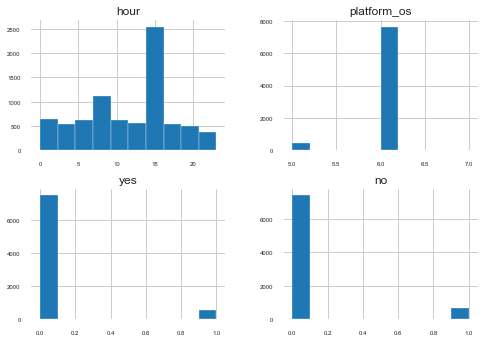

In [5]:
# histograms of the variables
fig = df.hist(xlabelsize=6, ylabelsize=6)
#[x.title.set_size(6) for x in fig.ravel()]
# show the plot
plt.show()

In [6]:
df.describe()

hour  platform_os          yes           no
count  8077.000000  8077.000000  8077.000000  8077.000000
mean     11.615080     5.947134     0.070818     0.083075
std       5.734879     0.224333     0.256537     0.276013
min       0.000000     5.000000     0.000000     0.000000
25%       7.000000     6.000000     0.000000     0.000000
50%      13.000000     6.000000     0.000000     0.000000
75%      15.000000     6.000000     0.000000     0.000000
max      23.000000     7.000000     1.000000     1.000000

<AxesSubplot:ylabel='Count'>

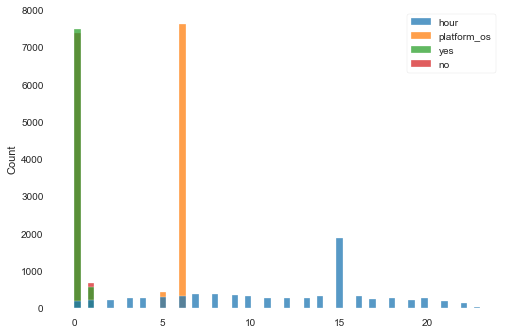

In [7]:
sb.histplot(df)

# A/B test Metrics and Evaluation

# A) Classical p-value based algorithm

In [8]:
# total number of users nunique count for each variable 

          # a) device_make
df1 = df.loc[df.experiment == 'exposed']
df2 = df.loc[df.experiment == 'control']
#number of unique devices in exposed group
device_make_exp = df1.device_make.nunique()
#number of unique devices in control group
device_make_con = df2.device_make.nunique()
print(device_make_exp,device_make_con)


218 169


In [9]:
          # a) platform_os
df1 = df.loc[df.experiment == 'exposed']
df2 = df.loc[df.experiment == 'control']
#number of unique devices in exposed group
platform_os_exp = df1.platform_os.nunique()
#number of unique devices in control group
platform_os_con = df2.platform_os.nunique()
print(platform_os_exp,platform_os_con)

3 2


In [10]:
# a) browser
df1 = df.loc[df.experiment == 'exposed']
df2 = df.loc[df.experiment == 'control']
#number of unique devices in exposed group
browser_exp = df1.browser.nunique()
#number of unique devices in control group
browser_con = df2.browser.nunique()
print(browser_exp,browser_con)

12 12


In [11]:
# total number of users in each  group
df1 = df.loc[df.experiment == 'exposed']
df2 = df.loc[df.experiment == 'control']
#number of unique devices in exposed group
auction_id_exp = df1.auction_id.nunique()
#number of unique devices in control group
auction_id_con = df2.auction_id.nunique()
print(auction_id_exp,auction_id_con)

4006 4071


In [26]:
#separate each user by day and compute avarage 

df.date = pd.to_datetime(df["date"])  #convert date to datetime object
df['day'] = df.date.dt.day    #extract the days
user = df[['auction_id', 'day']]
#groupby users per day
group = user.groupby('day').count() 
#calculate avarage user per day
average_user = group.auction_id.mean()
print('Average number of total users per day is:', average_user)  


Average number of total users per day is: 1009.625


In [32]:
#avarage number of exposed groups each day
all_users = df[['auction_id', 'day', 'experiment']]
exposed_users = all_users.loc[all_users.experiment == 'exposed']
#groupby using day and count
count = all_users.groupby('day').count()  
averge_expo_per_day = count.auction_id.mean()
print('Average number of users shown the ad per day:', averge_expo_per_day)
print('total exposed users:', len(exposed_users))


Average number of users shown the ad per day: 1009.625
total exposed users: 4006


In [38]:
# rate (# of exposed/total # of users)
tot_conv=averge_expo_per_day/ average_user
print('the total conversion rate is:', tot_conv)
#100% of users are exposed on avarage each day

the total conversion rate is: 1.0


In [36]:
#Retention is defined as the process by which a company ensures that the users donot see ad
user_r = df[['auction_id', 'yes', 'experiment', 'day']]
#access a group of rows and columns by exposed
user_r = user_r.loc[user_r.experiment == 'exposed']
#access a group of rows and columns by 1
user_r = user_r.loc[user_r.yes == 1]
#group by users by day
count_r = user_r.groupby('day').count() 
aver_r = count_r.auction_id.mean()
Ret = aver_r/averge_expo_per_day
print('Retention:', Ret)

Retention: 0.03813297016218893


In [39]:
#total conversions that turn out to be legitimate to see ad
print('the net conversion rate:',aver_r/average_user )


the net conversion rate: 0.03813297016218893


# confidence interval calculations

In [49]:
#Confidence intervals measure the degree of uncertainty or certainty in a sampling method.
check_list_result={"average_user":1010,"averge_expo_per_day":1010,"tot_conv":0.038133,
           "Retention":0.038133,"Net_Conv_rate":0.038133}
check_list_result

{'average_user': 1010,
 'averge_expo_per_day': 1010,
 'tot_conv': 0.038133,
 'Retention': 0.038133,
 'Net_Conv_rate': 0.038133}

In [50]:
# scaling counts assuming 5% error (5% confidence interval)
check_list_result["average_user"] = 202
check_list_result["averge_expo_per_day"]=int(check_list_result["averge_expo_per_day"]*(202/1010))
check_list_result

{'average_user': 202,
 'averge_expo_per_day': 202,
 'tot_conv': 0.038133,
 'Retention': 0.038133,
 'Net_Conv_rate': 0.038133}

In [68]:
#The minimum detectable effect (MDE) represents the relative minimum improvement over the baseline (check list status) that 
#you're willing to detect in an experiment, to a certain degree of statistical significance. 
#It can help you figure out the likely relationship between impact and result, 1% 
import math
#calculate the standard deviation for each of elements in the above dictionary
# calculating the sd for totalconversation rate, 1% 
Tot_Conv={}
Tot_Conv["MDE"]=0.01
Tot_Conv["p"]=check_list_result["tot_conv"]
Tot_Conv["n"]=check_list_result["average_user"]
Tot_Conv["sd"]=round(math.sqrt((Tot_Conv["p"]*(1-Tot_Conv["p"]))/Tot_Conv["n"]),5)
Tot_Conv["sd"]



0.01348

In [69]:
# calculating the sd for  Retention rate, 1% 

Retan={}
Retan["MDE"]=0.01
Retan["p"]=check_list_result["Retention"]
Retan["n"]=check_list_result["averge_expo_per_day"]
Retan["sd"]=round(math.sqrt((Retan["p"]*(1-Retan["p"]))/Retan["n"]),5)
Retan["sd"]

0.01348

In [70]:
# calculating the sd for  net conversation rate, 5% 
Net_Conv={}
Net_Conv["MDE"]=0.01
Net_Conv["p"]=check_list_result["Net_Conv_rate"]
Net_Conv["n"]=check_list_result["average_user"]
Net_Conv["sd"]=round(math.sqrt((Net_Conv["p"]*(1-Net_Conv["p"]))/Net_Conv["n"]),5)
Net_Conv["sd"]

0.01348

 our result indicates that the data points tend to be very close to the mean

# Perform hypothesis testing

##Steps in Hypothesis Testing:##

    1. Specify the Null Hypothesis.
    
    2.Specify the Alternative Hypothesis.
    
    3.Set the Significance Level
    
    4.Calculate the Test Statistic and Corresponding P-Value.
    
    5. Drawing a Conclusion

Hypothesis for data set:

    H₀: “exposed groups have same brand awareness with control one”
    
    H₁: “exposed groups have much brand awareness with control one”

# USe: α=0.05 (significance level ) and β=0. 1(power)

In [104]:
from scipy.stats import norm
def samplesize_ABtest(rA, dr, alpha, beta, sides):
    """
    return sample size for the AB test, 
    given 
    - baseline conversion rate rA  
    - required minimum difference dr = rB-rA,
    - significance level alpha
    - statistical power 1-beta
    """
    
    assert dr>1.e-20
    # conversion rate of control group
    rB = rA + dr
    
    zscore = norm.isf(alpha)
    zpower = norm.isf(beta)
    
    pooled_var = rA*(1-rA) + rB*(1-rB) # 2*r*(1-r)
    
    
    if sides ==2:  # two tailed
        zscore = norm.isf(alpha/2)
        
    n12 = (zscore+zpower)**2 * pooled_var/ dr**2  
    return n12

In [110]:

size = samplesize_ABtest(0.038133, 0.01, 0.95, 0.9, 1)
print("Sample size of exposed group in the two-tail test: {} \n The total sample size is: {}".format(np.floor(size), 
                                                                                               np.floor(2*size)))

Sample size of exposed group in the two-tail test: 7064.0 
 The total sample size is: 14129.0


In [111]:
# split data into control/exposed groups then agg by day

exposed = df.loc[df.experiment == 'exposed']
control = df.loc[df.experiment == 'control']

df_e = exposed.groupby('day').agg({'auction_id':'count', 'device_make':'count', 'platform_os':'count', 'browser':'count', 'yes':'sum', 'no':'sum'})
df_c = control.groupby('day').agg({'auction_id':'count', 'device_make':'count', 'platform_os':'count', 'browser':'count', 'yes':'sum', 'no':'sum'})

print(df_e)
print(df_c)

     auction_id  device_make  platform_os  browser  yes  no
day                                                        
3           470          470          470      470   43  49
4           477          477          477      477   46  45
5           528          528          528      528   35  39
6           294          294          294      294   23  25
7           257          257          257      257   22  24
8           714          714          714      714   58  61
9           728          728          728      728   55  64
10          538          538          538      538   26  42
     auction_id  device_make  platform_os  browser  yes   no
day                                                         
3          1545         1545         1545     1545  104  129
4           426          426          426      426   30   38
5           362          362          362      362   17   26
6           196          196          196      196   12   14
7           223          223      

In [112]:
# total number of users in both groups (checking for a significant difference)
print('exposed users', df_e.auction_id.sum())
print('control users', df_c.auction_id.sum())

exposed users 4006
control users 4071


In [ ]:
#thre difference is not much

In [114]:
a = df_c.auction_id.sum()
b = df_e.auction_id.sum()
c = a + b

p=0.5  #taking equal possibilities
alpha=0.05   #significance level
p_hat=round(a/(c),4)
sd=math.sqrt(p*(1-p)/(c))
ME=round(stats.norm.ppf(1 - (alpha)/2)*sd,4)
print("The confidence interval is between",p-ME,"and",p+ME,"; Is",p_hat,"inside this range?")

The confidence interval is between 0.4891 and 0.5109 ; Is 0.504 inside this range?


our observation on P^ is inside range 0.4891 and 0.5109

In [115]:
# Average total number of users on a daily basis 
print('Average number of total users per day (both groups):', average_user)  #average per day
e = df_e.auction_id.mean()
c = df_c.auction_id.mean()
print('Average number of total users per day in the exposed roup:', e)
print('Average number of total users per day in the control group:', c)

Average number of total users per day (both groups): 1009.625
Average number of total users per day in the exposed roup: 500.75
Average number of total users per day in the control group: 508.875


In [116]:
# making sure the difference is not significant and is random

a = e
b = c
d = a + b

p=0.5  #taking equal possibilities
alpha=0.05   #significance level
p_hat=round(a/(d),4)
sd=math.sqrt(p*(1-p)/(d))
ME=round(stats.norm.ppf(1 - (alpha)/2)*sd,4)
print("The confidence interval is between",p-ME,"and",p+ME,"; Is",p_hat,"inside this range?")

The confidence interval is between 0.4692 and 0.5308 ; Is 0.496 inside this range?


In [118]:
print(device_make_exp)
print(device_make_con)

# check the difference is not significant and is random
a = device_make_con
b =device_make_exp
c = a + b

p=0.5  #taking equal possibilities
alpha=0.05   #significance level
p_hat=round(a/(c),4)
sd=math.sqrt(p*(1-p)/(c))
ME=round(stats.norm.ppf(1 - (alpha)/2)*sd,4)
print("The confidence interval is between",p-ME,"and",p+ME,"; Is",p_hat,"inside this range?")

218
169
The confidence interval is between 0.4502 and 0.5498 ; Is 0.4367 inside this range?


In [119]:
# check the difference is not significant and is random

a = platform_os_con
b =platform_os_exp
c = a + b

p=0.5  #taking equal possibilities
alpha=0.05   #significance level
p_hat=round(a/(c),4)
sd=math.sqrt(p*(1-p)/(c))
ME=round(stats.norm.ppf(1 - (alpha)/2)*sd,4)
print("The confidence interval is between",p-ME,"and",p+ME,"; Is",p_hat,"inside this range?")

The confidence interval is between 0.06169999999999998 and 0.9383 ; Is 0.4 inside this range?


In [129]:
#Net Conversion - number of users who recall the ad divided by total users
recall_c=df_c["yes"].sum()
recall_e=df_e["yes"].sum()

a = df_c.auction_id.sum()
b = df_e.auction_id.sum()
c = a + b

NC_cont=recall_c/a
NC_exp=recall_e/b
NC_pooled=(recall_c+recall_e)/(a+b)
NC_sd_pooled=math.sqrt(NC_pooled*(1-NC_pooled)*(1/a+1/b))
NC_ME=round(stats.norm.ppf(1 - (alpha)/2)*NC_sd_pooled,4)
NC_diff=round(NC_exp-NC_cont,4)
print("The change due to the experiment is",NC_diff*100,"%")
print("Confidence Interval: [",NC_diff-NC_ME,",",NC_diff+NC_ME,"]")
print ("The change is statistically significant if the CI doesn't include 0. In that case, it is practically significant if",-Net_Conv["MDE"],"is not in the CI as well.")


The change due to the experiment is 1.2 %
Confidence Interval: [ 0.0008000000000000004 , 0.0232 ]
The change is statistically significant if the CI doesn't include 0. In that case, it is practically significant if -0.01 is not in the CI as well.


In [120]:
# making sure the difference is not significant and is random

a = browser_con
b =browser_exp
c = a + b

p=0.5  #taking equal possibilities
alpha=0.05   #significance level
p_hat=round(a/(c),4)
sd=math.sqrt(p*(1-p)/(c))
ME=round(stats.norm.ppf(1 - (alpha)/2)*sd,4)
print("The confidence interval is between",p-ME,"and",p+ME,"; Is",p_hat,"inside this range?")

The confidence interval is between 0.3 and 0.7 ; Is 0.5 inside this range?


In [57]:
#Since data is sample data and we do not know total poulation so we can use z-score
#to detect and remove outliers
# identify outliers with z-score it helps us to understand
# data value is greater or smaller than mean and how far away it is from the mean.

#col_outlier=df[['hour','platform_os','yes','no','experiment','browser','device_make']]
#z_scores = stats.zscore(col_outlier)
#find absolute value of each element
#abs_z_scores = np. abs(z_scores)
#filter rows with outlier and remove
#filtered_entries = (abs_z_scores < 3). all(axis=1)
#cleaned data
#new_df = df[filtered_entries]
#new_df
#plt.hist(z_scores)


<AxesSubplot:ylabel='Count'>

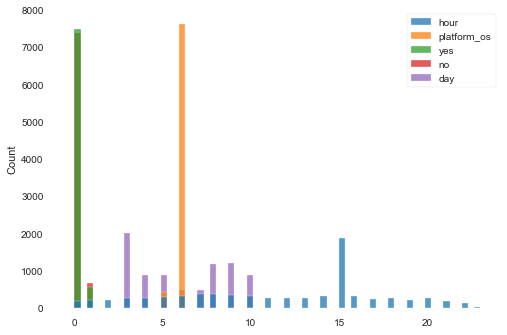

In [126]:
sb.histplot(df)

In [10]:
#sb.histplot(new_df)

In [11]:
#missing value

#new_df.info()


In [12]:

#new_df.describe()

In [13]:
#new_df.corr()

In [14]:
#do individual correlation
focus_cols = ['platform_os']
df.corr().filter(focus_cols).drop(focus_cols)
df.corr()

experiment      hour  device_make  platform_os   browser  \
experiment     1.000000 -0.155410    -0.052660     0.102422 -0.112328   
hour          -0.155410  1.000000    -0.005087     0.000062  0.036386   
device_make   -0.052660 -0.005087     1.000000    -0.584501  0.596415   
platform_os    0.102422  0.000062    -0.584501     1.000000 -0.223611   
browser       -0.112328  0.036386     0.596415    -0.223611  1.000000   
yes            0.023459  0.013481    -0.012299     0.054305  0.002728   
no             0.014535 -0.021725    -0.021777     0.046941  0.008113   

                  yes        no  
experiment   0.023459  0.014535  
hour         0.013481 -0.021725  
device_make -0.012299 -0.021777  
platform_os  0.054305  0.046941  
browser      0.002728  0.008113  
yes          1.000000 -0.083098  
no          -0.083098  1.000000

 From the correlation table we see that some variables are correlated for instanc, browser and   device_make correlated  

In [15]:
import scipy.stats as ss

from scipy.stats import pearsonr

# B) Sequential A/B testing algorithm

array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'hour'}>],
       [<AxesSubplot:title={'center':'platform_os'}>,
        <AxesSubplot:title={'center':'yes'}>],
       [<AxesSubplot:title={'center':'no'}>,
        <AxesSubplot:title={'center':'day'}>]], dtype=object)

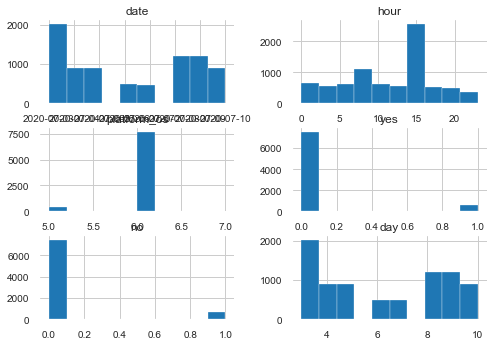

In [130]:
from pandas.plotting import scatter_matrix
import pandas.plotting as plt

df.hist()

C:\Users\Smegn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AttributeError: module 'pandas.plotting' has no attribute 'show'

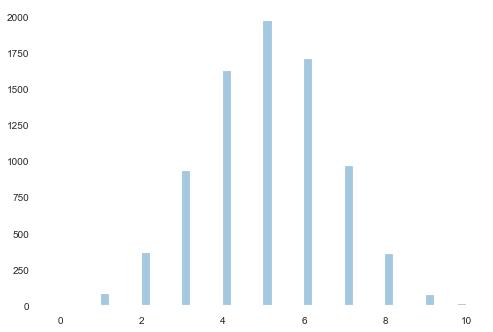

In [131]:
from numpy import random
sb.distplot(random.binomial(n=10, p=0.5, size=8077), hist=True, kde=False)

plt.show()

In [134]:
df_testsummary = df.pivot_table(values='platform_os', index='experiment', aggfunc=np.sum)
# add additional columns to the pivot table
df_testsummary['total_pl'] = df.pivot_table(values='platform_os', index='experiment', aggfunc=lambda x: len(x))
df_testsummary['rate_pl'] = df.pivot_table(values='platform_os', index='experiment')
df_testsummary = df.pivot_table(values='platform_os', index='experiment', aggfunc=np.sum)
df_testsummary

platform_os
experiment             
control           24118
exposed           23917

C:\Users\Smegn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

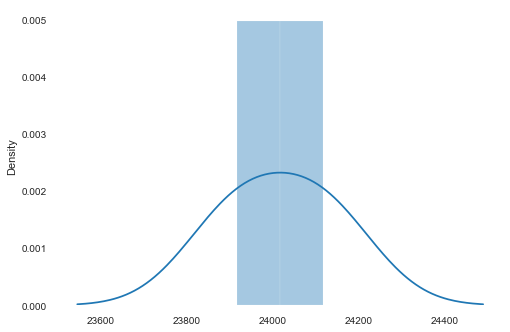

In [137]:
sb.distplot(df_testsummary)